In [1]:
# importion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

make_classification(...) 是 sklearn 里的函数，用来 生成一个模拟的分类数据集
- X：特征数据，形状是 (200, 2)，每行是一个样本，有两个特征

- y：标签数组，形状是 (200,)，值是 0 或 1

In [2]:
# data
np.random.seed(0)
X, y = make_classification(n_samples=200, n_features=2,
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1)

In [3]:
# model
forest = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=0)
forest.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=30, random_state=0)

<ipython-input-4-aeca540161d6>:18: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


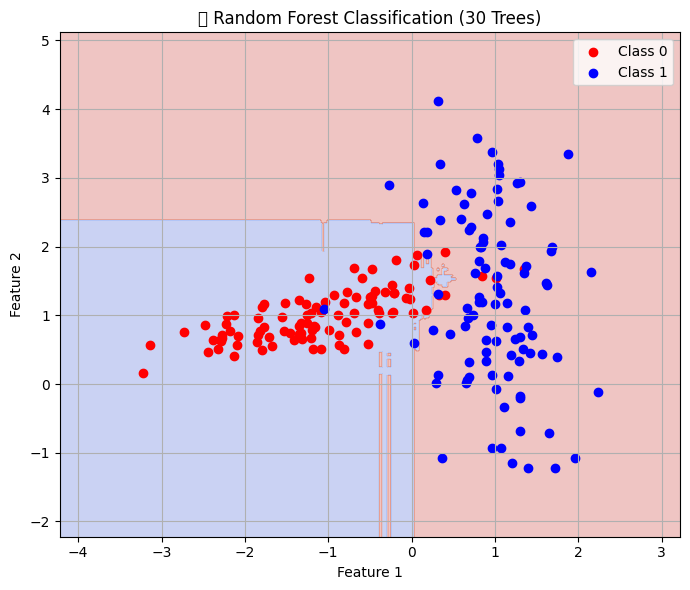

In [4]:
# visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.title("🌲 Random Forest Classification (30 Trees)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()